In [11]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set the path to your .txt statistics file from juicer output
MY_STATS_FILE = 'opt/juicer/aliinter_30.txt'

In [12]:
data = pd.read_csv(MY_STATS_FILE, sep=":", header=0, names=['category', 'num'])

In [13]:
# Check your original statistics
print(data)

                              category                             num
0                 Sequenced Read Pairs                     146,744,347
1                        Normal Paired            124,113,720 (84.58%)
2                      Chimeric Paired              12,899,575 (8.79%)
3                   Chimeric Ambiguous               3,062,633 (2.09%)
4                             Unmapped               6,668,419 (4.54%)
5               Ligation Motif Present             59,747,652 (40.72%)
6   Alignable (Normal+Chimeric Paired)            137,013,295 (93.37%)
7                         Unique Reads            122,643,528 (83.58%)
8                       PCR Duplicates              14,330,840 (9.77%)
9                   Optical Duplicates                  38,927 (0.03%)
10         Library Complexity Estimate                     608,099,392
11                Intra-fragment Reads       2,483,267 (1.69% / 2.02%)
12                Below MAPQ Threshold    37,971,193 (25.88% / 30.96%)
13    

In [14]:
# Format to only return the actual number of reads per category
data['num'] = data['num'].str.replace(',', '')
data['num'] = data['num'].str.strip()
data['num'] = data['num'].str.split()
data['num'] = data['num'].str[0]

In [15]:
# Format category names and drop rows that do not contain numbers of reads
data['category'] = data['category'].str.strip()
data = data.drop([5, 10, 15, 16])

In [16]:
# Change the datatype to integer
data['num'] = data['num'].astype('int')

In [17]:
# Calculate percentages from sequenced, unique and valid reads
sequenced = data['num'][0]
unique = data['num'][7]
valid = data['num'][13]
data['percent_sequenced'] = data['num'].apply(lambda x: x / sequenced * 100 if sequenced > x else np.nan)
data['percent_unique'] = data['num'].apply(lambda x: x / unique * 100 if unique > x else np.nan)
data['percent_valid'] = data['num'].apply(lambda x: x / valid * 100 if valid > x else np.nan)
data['percent_unique'][0:6] = np.nan
data['percent_valid'][0:12] = np.nan

<ipython-input-17-c37ebb640983>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percent_unique'][0:6] = np.nan
<ipython-input-17-c37ebb640983>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percent_valid'][0:12] = np.nan


[Text(0.5, 1.0, 'Percentage from all sequenced reads')]

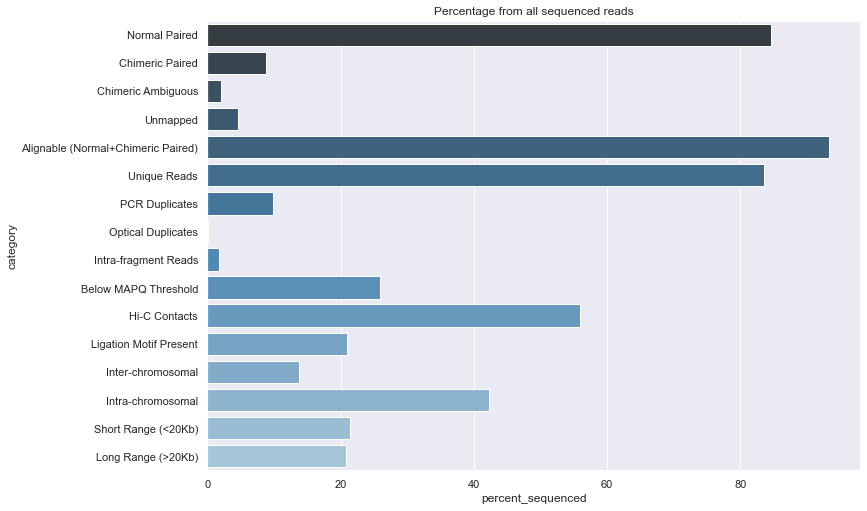

In [18]:
# Plot statistics from all sequenced reads
sns.barplot(x="percent_sequenced", y="category", data=data[~data['percent_sequenced'].isna()], 
            palette="Blues_d").set(title = 'Percentage from all sequenced reads')

[Text(0.5, 1.0, 'Percentage from all unique reads')]

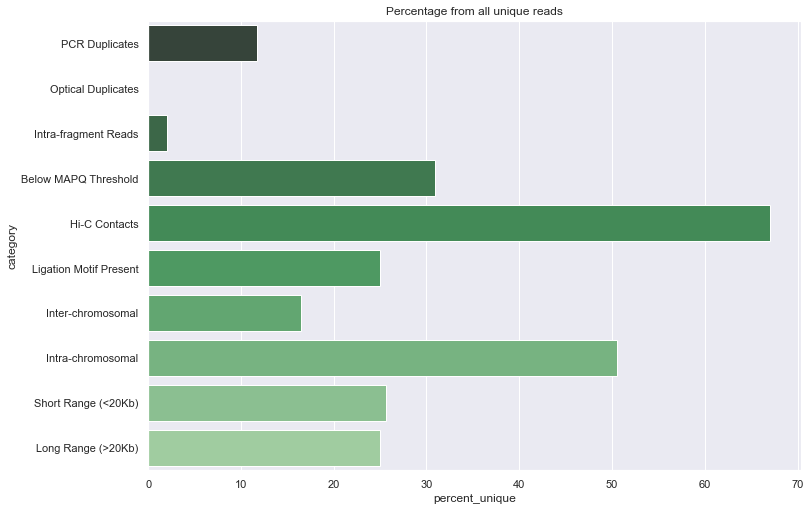

In [19]:
# Plot statistics from only unique reads
sns.barplot(x="percent_unique", y="category", data=data[~data['percent_unique'].isna()], 
            palette="Greens_d").set(title = 'Percentage from all unique reads')

[Text(0.5, 1.0, 'Percentage from all valid Hi-C contacts')]

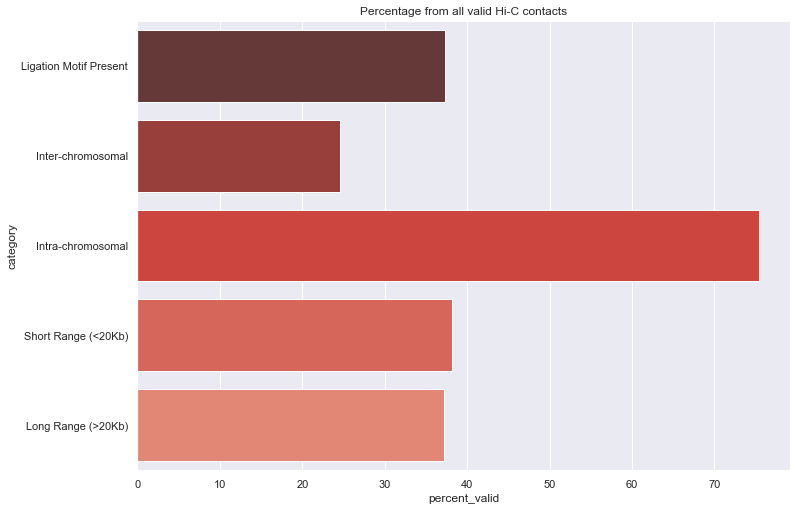

In [20]:
# Plot statistics from all valid Hi-C contacts
sns.barplot(x="percent_valid", y="category", data=data[~data['percent_valid'].isna()], 
            palette="Reds_d").set(title = 'Percentage from all valid Hi-C contacts')